In [63]:
import numpy as np
from numpy import linalg as LA

m, n = 2, 3
A = np.random.randn(m, n)
U, S, V = LA.svd(A)# A = U * S * V (V here means V.T)
print('Frobenius norm of (UU^T - I) =', LA.norm(np.dot(U, U.T) - np.eye(m))) # Check if U is orthogonal
print('S =', S) # S is a diagonal matrix (3, 4) with nonnegative decreasing values in the diagonal, S just shows diagonal values
print('Frobenius norm of (VV^T - I) =', LA.norm(np.dot(V, V.T) - np.eye(n))) # Check if U is orthogonal

Frobenius norm of (UU^T - I) = 4.57251370568676e-16
S = [3.2214792  0.23382689]
Frobenius norm of (VV^T - I) = 5.38974894207531e-16


In [81]:
from urllib import request
request.urlretrieve('https://raw.githubusercontent.com/tiepvupsu/ebookML_src/master/src/svd/img0.jpg', 'img0.jpg')

('img0.jpg', <http.client.HTTPMessage at 0x29d209454a8>)

# Image Compression

In [4]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

%matplotlib inline

(-0.5, 1439.5, 959.5, -0.5)

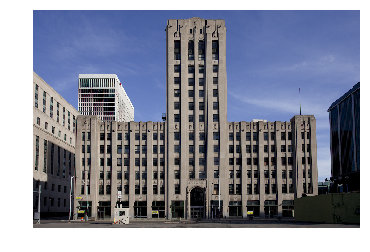

In [156]:
img = mpimg.imread('building2.jpg')
plt.imshow(img)
plt.axis('off')

In [159]:
img.shape

(960, 1440, 3)

(-0.5, 1439.5, 959.5, -0.5)

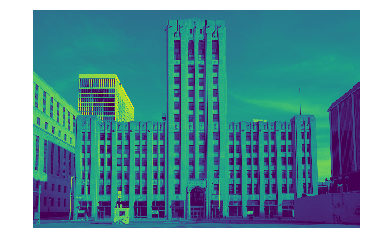

In [157]:
# Image to gray, because original image cannot be implemented by SVD
gray = .2125*img[:, :, 0] + .7154*img[:, :, 1] + .0721*img[:, :, 2]
plt.imshow(gray)
plt.axis('off')

In [69]:
U, S, V = LA.svd(gray)

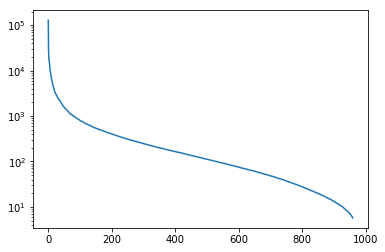

In [70]:
plt.semilogy(S)

In [75]:
def approximate_rank_k(U, S, V, k):
    """
    After implementing SVD, reconstruct the original matrix by multiplying k rows and columns of U, S, V
    """
    Uk = U[:, :k]
    Sk = S[:k]
    Vk = V[:k, :]
    return np.around(np.dot(np.dot(Uk, np.diag(Sk)), Vk))

def accuracy(S, k):
    """
    Calculate the accuracy of SVD image and original image by eigen values
    """
    return np.sum(S[:k+1]**2, axis=0)*100/np.sum(S**2, axis=0) 

def compress_ratio(m, n, k):
    """
    Image compression ratio of truncated SVD image and original image
    Arguments:
    m -- U.shape[0]
    k -- hyper-parameter
    n -- V.shape[0]
    """
    return (4*k*(m+n+1))/(m*n)

A_save = []
K = [5, 50, 100]
for k in K:
    A_save.append(approximate_rank_k(U, S, V, k))

In [149]:
m, n, k = 960, 1440, 100
compress_ratio(m, n, k)

0.6947337962962963

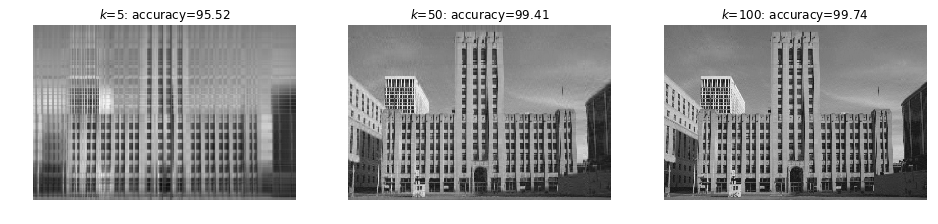

In [82]:
# The accuracy of various hyper-parameter k
plt.figure(figsize=(16, 8))
for i, k in enumerate(K):
    plt.subplot(1, 3, i+1)
    plt.imshow(A_save[i], cmap='gray')
    plt.title('$k$=%d: accuracy=%.2f' % (k, accuracy(S, k)))
    plt.axis('off')

In [150]:
def estimate_by_svd(img_name):
    """
    Combine all above functions
    """
    #Read an image
    img = mpimg.imread(img_name)
    
    # Image to gray (original image cannot be svd)
    gray = .2125*img[:, :, 0] + .7154*img[:, :, 1] + .0721*img[:, :, 2]
    
    # Plot SVD image
    plt.figure(figsize=(16, 16))
    plt.subplot(1, 4, 1)
    plt.imshow(gray)
    plt.title('Gray Scale')
    plt.axis('off')
    
    # Implement SVD on gray image
    U, S, V = LA.svd(gray)
    
    # Evaluate SVD by k = 5, 50, 100
    A_save = []
    k = [5, 50, 100]
    for k in K:
        A_save.append(approximate_rank_k(U, S, V, k))
    
    for i, k in enumerate(K):
        plt.subplot(1, 4, i+2)
        plt.imshow(A_save[i], cmap='gray')
        plt.title('$k$=%d: accuracy=%.2f,Ratio=%.2f' % (k, accuracy(S, k), compress_ratio(U.shape[0], V.shape[1], k)))
        plt.axis('off')

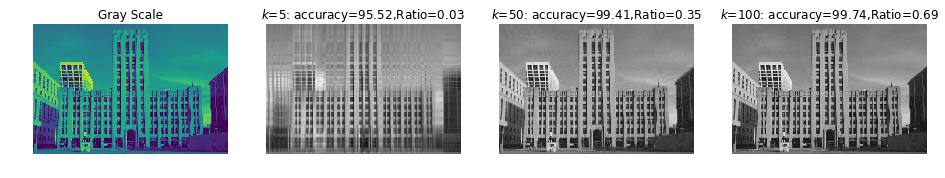

In [151]:
estimate_by_svd('building2.jpg')

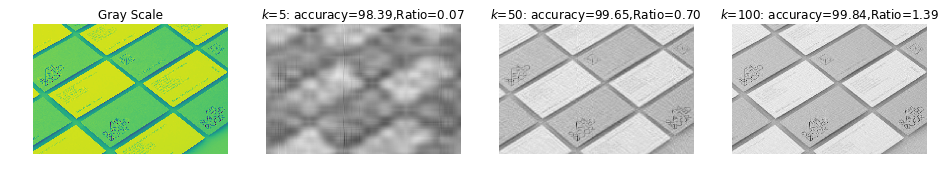

In [152]:
estimate_by_svd('img0.jpg')

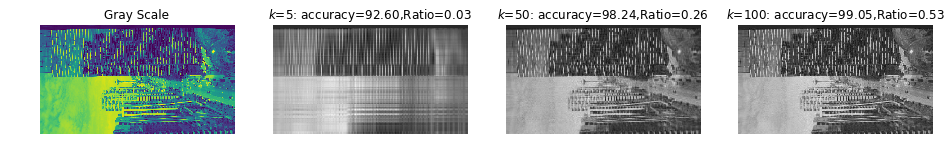

In [153]:
estimate_by_svd('building.jpg')